In [16]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-performance-factors' dataset.
Path to dataset files: /kaggle/input/student-performance-factors


In [17]:
import pandas as pd
df = pd.read_csv(path + '/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


#Data Overview

In [18]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [20]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [35]:
df.isna().sum() * 100 / len(df)

,0
Hours_Studied,0.0
Attendance,0.0
Parental_Involvement,0.0
Access_to_Resources,0.0
Extracurricular_Activities,0.0
Sleep_Hours,0.0
Previous_Scores,0.0
Motivation_Level,0.0
Internet_Access,0.0
Tutoring_Sessions,0.0


In [30]:
df = df.dropna()

In [31]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [62]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


#Outliers

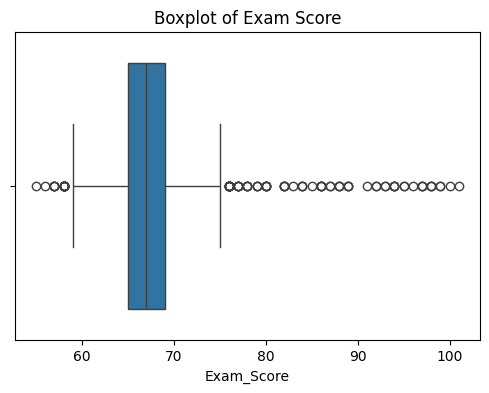

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Exam_Score'])
plt.title("Boxplot of Exam Score")
plt.show()

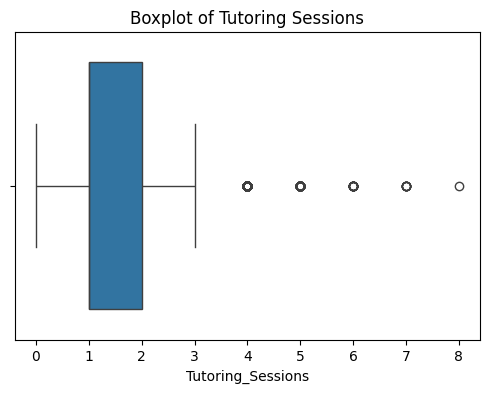

In [66]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Tutoring_Sessions'])
plt.title("Boxplot of Tutoring Sessions")
plt.show()

#quantitative and qualitative groups

In [74]:
Quan = df.select_dtypes(include=['int64']).columns
Qual = df.select_dtypes(include=['object']).columns
print("Quantitative:", Quan)
print("Qualitative:", Qual)

Quantitative: Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')
Qualitative: Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


#Analysis Qual

In [73]:
#quantitative vs exam_score
df[Quan].corr()['Exam_Score'].sort_values(ascending=False)

,Exam_Score
Exam_Score,1.000000
Attendance,0.580259
Hours_Studied,0.445104
Previous_Scores,0.174283
Tutoring_Sessions,0.156829
Physical_Activity,0.025148
Sleep_Hours,-0.017171


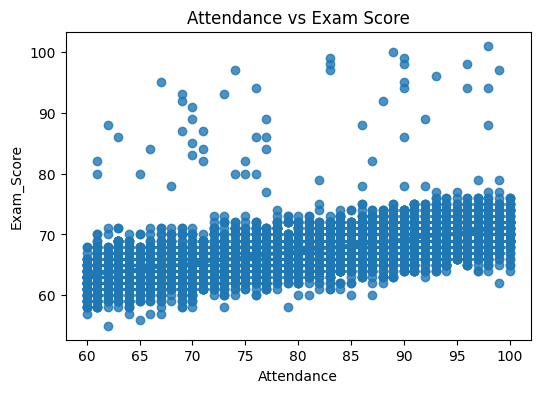

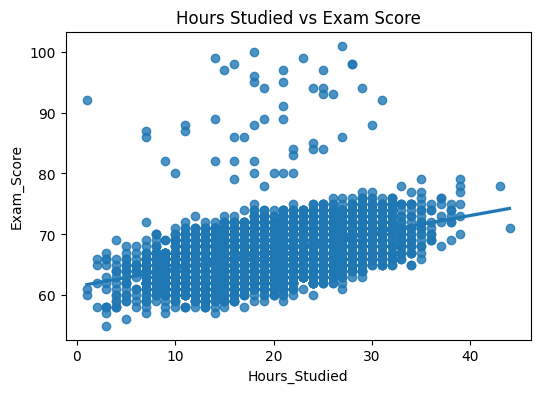

In [71]:
plt.figure(figsize=(6,4))
sns.regplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Hours Studied vs Exam Score")
plt.show()

#Attendance and hours studied both show a clear positive relationship with exam scores.

#Analyze Qual

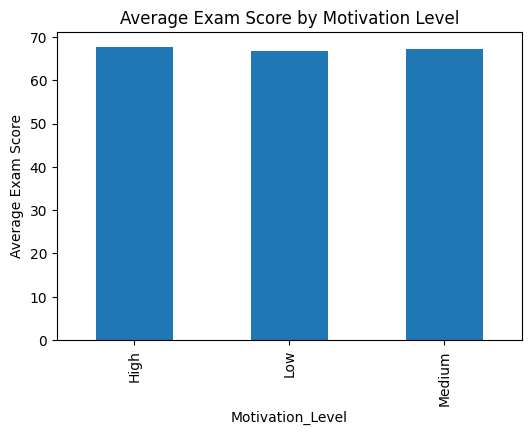

In [76]:
plt.figure(figsize=(6,4))
df.groupby('Motivation_Level')['Exam_Score'].mean().plot(kind='bar')
plt.title("Average Exam Score by Motivation Level")
plt.ylabel("Average Exam Score")
plt.show()

#Motivation level shows minimal difference in average exam scores.

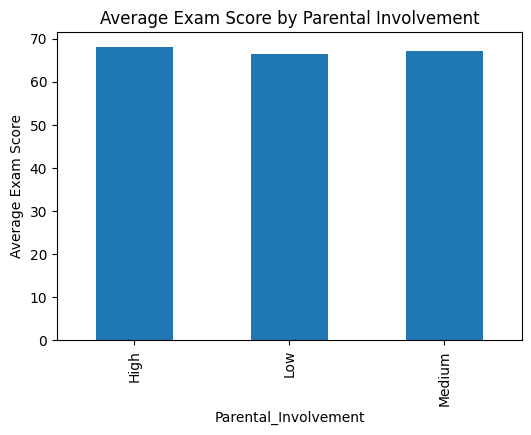

In [84]:
plt.figure(figsize=(6,4))
df.groupby('Parental_Involvement')['Exam_Score'].mean().plot(kind='bar')
plt.title("Average Exam Score by Parental Involvement")
plt.ylabel("Average Exam Score")
plt.show()

#Parental involvement has little impact on exam performance.

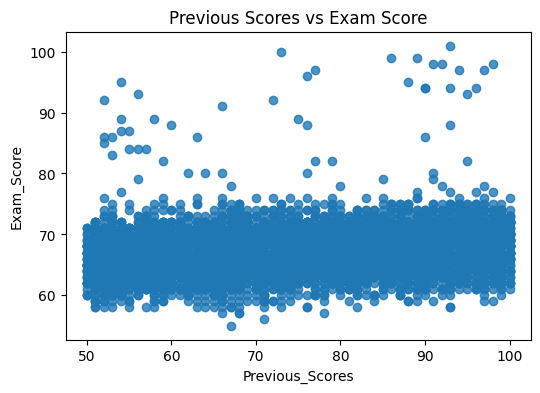

In [85]:
plt.figure(figsize=(6,4))
sns.regplot(x='Previous_Scores', y='Exam_Score', data=df)
plt.title("Previous Scores vs Exam Score")
plt.show()

#Previous scores show a weak positive relationship with current exam scores.